In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime as dt
import hvplot.xarray

from dask.distributed import LocalCluster
from skimage.measure import label

import sys
sys.path.append('C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/UtilityCode/DataAccess/Utilities')
import PreProcess_Utils as pputil

sys.path.append('C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/UtilityCode/Modelling/Utilities')
import Snow_Utils as snow_util

In [2]:
cluster = LocalCluster(n_workers = 10, threads_per_worker = 10) # Refined through testing
client = cluster.get_client()
client # Can open in other window by clicking 'Dashboard' link below

<Client: 'tcp://127.0.0.1:50403' processes=10 threads=100, memory=127.65 GiB>

2024-09-17 15:14:35,691 - distributed.nanny - WARNING - Restarting worker
2024-09-17 15:14:35,707 - distributed.nanny - WARNING - Restarting worker
2024-09-17 15:14:35,717 - distributed.nanny - WARNING - Restarting worker
2024-09-17 15:14:35,729 - distributed.nanny - WARNING - Restarting worker
2024-09-17 15:14:35,742 - distributed.nanny - WARNING - Restarting worker
2024-09-17 15:14:35,755 - distributed.nanny - WARNING - Restarting worker
2024-09-17 15:14:35,765 - distributed.nanny - WARNING - Restarting worker
2024-09-17 15:14:35,781 - distributed.nanny - WARNING - Restarting worker
2024-09-17 15:14:35,793 - distributed.nanny - WARNING - Restarting worker
2024-09-17 15:14:35,800 - distributed.nanny - WARNING - Restarting worker


In [3]:
tile_stats = pd.read_csv(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\Canada\Snow Dynamics\IMS (1 km)\Outputs\tiles_IMS_SnowDynamics4HLS.csv", index_col = 0)
tile_stats

smin_avg  smax_avg  sstart_avg    send_avg  send_last  sstart_first
0     212.16667      36.6    3.000000   67.000000       90.0         335.0
1     219.50000      39.6    1.800000   73.600000       90.0         335.0
2     211.66667      36.6    9.800000   66.400000       90.0         335.0
3     196.33333      35.6   35.333332   69.333336       90.0         335.0
4     211.83333      39.4    5.200000   65.200000       90.0         335.0
...         ...       ...         ...         ...        ...           ...
3386  232.00000      39.2 -132.000000  232.000000        NaN           NaN
3387  227.83333      40.2 -136.166670  227.833330        NaN           NaN
3388  225.00000      37.6 -139.000000  225.000000        NaN           NaN
3389  230.33333      33.6 -133.666670  230.333330        NaN           NaN
3390  183.00000       0.8 -181.000000  183.000000        NaN           NaN

[3391 rows x 6 columns]

In [4]:
tile = 904 #904

In [5]:
tile_stats.loc[tile]

smin_avg        225.0
smax_avg         41.0
sstart_avg      -66.4
send_avg        152.4
send_last       156.0
sstart_first    279.0
Name: 904, dtype: float64

# Load winter year snow dynamics cubes

In [6]:
%%time
folder = r'C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\HBL\TemporalSnow\Fmask_V1\Products\winterYear_tile' + '/' + str(tile)

snowDynamics = xr.open_mfdataset(folder + '/*.nc', 
                                 engine = 'netcdf4',
                                 chunks = None).compute() # Added compute here, not sure what faster
snowDynamics

CPU times: total: 3.7 s
Wall time: 7.71 s


<xarray.Dataset> Size: 721MB
Dimensions:                    (winterYear: 5, y: 2001, x: 2001)
Coordinates:
  * winterYear                 (winterYear) <U9 180B '2018-2019' ... '2022-2023'
  * x                          (x) float64 16kB 6.49e+05 6.49e+05 ... 7.09e+05
  * y                          (y) float64 16kB 6.553e+05 ... 5.953e+05
    spatial_ref                int64 8B 0
    band                       <U5 20B 'Fmask'
Data variables:
    snow_start                 (winterYear, y, x) float32 80MB -100.0 ... -53.0
    snow_end                   (winterYear, y, x) float32 80MB 131.0 ... 136.0
    snow_length                (winterYear, y, x) uint16 40MB 232 232 ... 190
    snow_periods               (winterYear, y, x) uint8 20MB 1 1 1 1 ... 1 1 1 1
    snow_status                (winterYear, y, x) uint8 20MB 0 0 0 0 ... 0 0 0 0
    snow_start_u               (winterYear, y, x) float32 80MB 13.5 13.5 ... 7.0
    snow_end_u                 (winterYear, y, x) float32 80MB 7.0 7.0 ... 2.5
    snow_length_u              (winterYear, y, x) float32 80MB 20.5 20.5 ... 9.5
    snowSeason_clearObsPerDay  (winterYear, y, x) float32 80MB 0.09871 ... 0....
    snowFall_clearObsPerDay    (winterYear, y, x) float32 80MB 0.0 ... 0.08163
    snowMelt_clearObsPerDay    (winterYear, y, x) float32 80MB 0.1429 ... 0.2245

In [7]:
# snowDynamics['snow_end'][0].rio.to_raster('snowEnd_1819_904.tif')
# snowDynamics['snow_end'][1].rio.to_raster('snowEnd_1920_904.tif')
# snowDynamics['snow_end'][2].rio.to_raster('snowEnd_2021_904.tif')
# snowDynamics['snow_end'][3].rio.to_raster('snowEnd_2122_904.tif')
# snowDynamics['snow_end'][4].rio.to_raster('snowEnd_2223_904.tif')

In [8]:
snowDynamics.rio.crs

CRS.from_epsg(3979)

# Plots

In [ ]:
# snowDynamics['snow_start'].plot(col = 'winterYear', cmap = 'viridis', vmin = -100, vmax = 0)

In [ ]:
# snowDynamics['snow_start'].plot()
# print(round(float(snowDynamics['snow_start'].mean()), 1))
# print(round(float(snowDynamics['snow_start'].std()), 1))

In [ ]:
# snowDynamics['snow_end'].plot(col = 'winterYear', cmap = 'viridis', vmin = 100, vmax = 190)

In [ ]:
# snowDynamics['snow_end'].plot()
# print(round(float(snowDynamics['snow_end'].mean()), 1))
# print(round(float(snowDynamics['snow_end'].std()), 1))

In [ ]:
#snowDynamics['snow_end_u'].isnull().sum()

In [ ]:
# snowDynamics['snow_length'].plot(col = 'winterYear', cmap = 'viridis', vmin = 180, vmax = 230)

In [ ]:
# snowDynamics['snow_length'].plot(xlim = (180, 230))
# print(round(float(snowDynamics['snow_length'].mean()), 1))
# print(round(float(snowDynamics['snow_length'].std()), 1))

In [ ]:
# snowDynamics['snow_periods'].plot(col = 'winterYear', cmap = 'viridis', vmin = 1, vmax = 2)

In [ ]:
# snowDynamics['snow_status'].plot(col = 'winterYear')

In [ ]:
# snowDynamics['snow_start_u'].plot(col = 'winterYear', cmap = 'viridis', vmin = 0, vmax = 40)

In [ ]:
# snowDynamics['snow_start_u'].plot(xlim = (0, 40))
# print(round(float(snowDynamics['snow_start_u'].mean()), 1))
# print(round(float(snowDynamics['snow_start_u'].std()), 1))

In [ ]:
# snowDynamics['snow_end_u'].plot(col = 'winterYear', cmap = 'viridis', vmin = 0, vmax = 15)

In [ ]:
# snowDynamics['snow_end_u'].plot(xlim = (0, 15))
# print(round(float(snowDynamics['snow_end_u'].mean()), 1))
# print(round(float(snowDynamics['snow_end_u'].std()), 1))

In [ ]:
# snowDynamics['snow_length_u'].plot(col = 'winterYear', cmap = 'viridis', vmin = 0, vmax = 50)

In [ ]:
# snowDynamics['snow_length_u'].plot(xlim = (0, 50))
# print(round(float(snowDynamics['snow_length_u'].mean()), 1))
# print(round(float(snowDynamics['snow_length_u'].std()), 1))

In [ ]:
# snowDynamics['snowSeason_clearObsPerDay'].plot(col = 'winterYear', cmap = 'viridis', vmin = 0, vmax = 0.3)

In [ ]:
# snowDynamics['snowSeason_clearObsPerDay'].plot(xlim = (0, 0.3))
# print(round(float(snowDynamics['snowSeason_clearObsPerDay'].mean()), 2))
# print(round(float(snowDynamics['snowSeason_clearObsPerDay'].std()), 2))

In [ ]:
# snowDynamics['snowFall_clearObsPerDay'].plot(col = 'winterYear', cmap = 'viridis', vmin = 0, vmax = 0.3)

In [ ]:
# snowDynamics['snowFall_clearObsPerDay'].plot(xlim = (0, 0.3))
# print(round(float(snowDynamics['snowFall_clearObsPerDay'].mean()), 2))
# print(round(float(snowDynamics['snowFall_clearObsPerDay'].std()), 2))

In [ ]:
# snowDynamics['snowMelt_clearObsPerDay'].plot(col = 'winterYear', cmap = 'viridis', vmin = 0, vmax = 0.3)

In [ ]:
# snowDynamics['snowMelt_clearObsPerDay'].plot(xlim = (0, 0.3))
# print(round(float(snowDynamics['snowMelt_clearObsPerDay'].mean()), 2))
# print(round(float(snowDynamics['snowMelt_clearObsPerDay'].std()), 2))

# InterannualSnowDynamics()

## mean

In [ ]:
# %%time
# mean = snow_util.interannualSnowDynamics(snowDynamics, 
#                                          products = ['start', 'end', 'length', 'periods', 'status'],
#                                          uncertainty = ['start_u', 'end_u', 'length_u'],
#                                          clearObsPerDay = ['season', 'fall', 'melt'], 
#                                          type = 'mean',
#                                          sd = False, 
#                                          min_count = 'half',
#                                          verbose = True)
# mean

In [ ]:
# mean.nbytes / 1e9

In [ ]:
# mean['snow_start_mn'].plot(cmap = 'viridis', vmin = -100, vmax = 0)

In [ ]:
# mean['snow_start_mn'].plot.hist(xlim = (-100, 0))
# print(round(float(mean['snow_start_mn'].mean()), 1))
# print(round(float(mean['snow_start_mn'].std()), 1))

In [ ]:
# mean['snow_end_mn'].plot(cmap = 'viridis', vmin = 120, vmax = 160)
# #mean['snow_end_mn'].rio.to_raster('snowEnd_1823_mean.tif')

In [ ]:
# mean['snow_end_mn'].plot.hist(xlim = (120, 160))
# print(round(float(mean['snow_end_mn'].mean()), 1))
# print(round(float(mean['snow_end_mn'].std()), 1))

In [ ]:
# mean['snow_length_mn'].plot(cmap = 'viridis', vmin = 180, vmax = 230)

In [ ]:
# mean['snow_length_mn'].plot.hist(xlim = (180, 230))
# print(round(float(mean['snow_length_mn'].mean()), 1))
# print(round(float(mean['snow_length_mn'].std()), 1))

In [ ]:
# mean['snow_periods_mn'].plot(cmap = 'viridis', vmin = 1, vmax = 2)

In [ ]:
# mean['snow_periods_mn'].plot.hist(xlim = (1, 2))
# print(round(float(mean['snow_periods_mn'].mean()), 1))
# print(round(float(mean['snow_periods_mn'].std()), 1))

In [ ]:
# mean['pPerennialSnow'].plot()

In [ ]:
# mean['pSnowFree'].plot()

In [ ]:
# mean['snow_start_u_mn'].plot(cmap = 'viridis', vmin = 0, vmax = 40)

In [ ]:
# mean['snow_start_u_mn'].plot.hist(xlim = (0, 40))
# print(round(float(mean['snow_start_u_mn'].mean()), 1))
# print(round(float(mean['snow_start_u_mn'].std()), 1))

In [ ]:
# mean['snow_end_u_mn'].plot(cmap = 'viridis', vmin = 0, vmax = 15)

In [ ]:
# mean['snow_end_u_mn'].plot.hist(xlim = (0, 15))
# print(round(float(mean['snow_end_u_mn'].mean()), 1))
# print(round(float(mean['snow_end_u_mn'].std()), 1))

In [ ]:
# mean['snow_length_u_mn'].plot(cmap = 'viridis', vmin = 0, vmax = 50)

In [ ]:
# mean['snow_length_u_mn'].plot.hist(xlim = (0, 50))
# print(round(float(mean['snow_length_u_mn'].mean()), 1))
# print(round(float(mean['snow_length_u_mn'].std()), 1))

In [ ]:
# mean['snowSeason_clearObsPerDay_mn'].plot(cmap = 'viridis', vmin = 0, vmax = 0.3)

In [ ]:
# mean['snowSeason_clearObsPerDay_mn'].plot.hist(xlim = (0, 0.3))
# print(round(float(mean['snowSeason_clearObsPerDay_mn'].mean()), 2))
# print(round(float(mean['snowSeason_clearObsPerDay_mn'].std()), 2))

In [ ]:
# mean['snowFall_clearObsPerDay_mn'].plot(cmap = 'viridis', vmin = 0, vmax = 0.3)

In [ ]:
# mean['snowFall_clearObsPerDay_mn'].plot.hist(xlim = (0, 0.3))
# print(round(float(mean['snowFall_clearObsPerDay_mn'].mean()), 2))
# print(round(float(mean['snowFall_clearObsPerDay_mn'].std()), 2))

In [ ]:
# mean['snowMelt_clearObsPerDay_mn'].plot(cmap = 'viridis', vmin = 0, vmax = 0.3)

In [ ]:
# mean['snowMelt_clearObsPerDay_mn'].plot.hist(xlim = (0, 0.3))
# print(round(float(mean['snowMelt_clearObsPerDay_mn'].mean()), 2))
# print(round(float(mean['snowMelt_clearObsPerDay_mn'].std()), 2))

## mean_clean

In [ ]:
# %%time
# mean_clean = snow_util.interannualSnowDynamics(snowDynamics, 
#                                                products = ['start', 'end', 'length', 'periods', 'status'],
#                                                uncertainty = ['start_u', 'end_u', 'length_u'],
#                                                clearObsPerDay = ['season', 'fall', 'melt'], 
#                                                type = 'mean_clean',
#                                                sd = False, 
#                                                min_count = 'half',
#                                                verbose = True)
# mean_clean

In [ ]:
# mean_clean.nbytes / 1e9

In [ ]:
# mean_clean['snow_start_mn'].plot(cmap = 'viridis', vmin = -100, vmax = 0)

In [ ]:
# mean_clean['snow_start_mn'].plot.hist(xlim = (-100, 0))
# print(round(float(mean_clean['snow_start_mn'].mean()), 1))
# print(round(float(mean_clean['snow_start_mn'].std()), 1))

In [ ]:
# mean_clean['snow_end_mn'].plot(cmap = 'viridis', vmin = 120, vmax = 160)
# #mean['snow_end_mn'].rio.to_raster('snowEnd_1823_mean.tif')

In [ ]:
# mean_clean['snow_end_mn'].plot.hist(xlim = (120, 160))
# print(round(float(mean_clean['snow_end_mn'].mean()), 1))
# print(round(float(mean_clean['snow_end_mn'].std()), 1))

In [ ]:
# mean_clean['snow_length_mn'].plot(cmap = 'viridis', vmin = 180, vmax = 230)

In [ ]:
# mean_clean['snow_length_mn'].plot.hist(xlim = (180, 230))
# print(round(float(mean_clean['snow_length_mn'].mean()), 1))
# print(round(float(mean_clean['snow_length_mn'].std()), 1))

In [ ]:
# mean_clean['snow_start_u_mn'].plot(cmap = 'viridis', vmin = 0, vmax = 40)

In [ ]:
# mean_clean['snow_start_u_mn'].plot.hist(xlim = (0, 40))
# print(round(float(mean_clean['snow_start_u_mn'].mean()), 1))
# print(round(float(mean_clean['snow_start_u_mn'].std()), 1))

In [ ]:
# mean_clean['snow_end_u_mn'].plot(cmap = 'viridis', vmin = 0, vmax = 15)

In [ ]:
# mean_clean['snow_end_u_mn'].plot.hist(xlim = (0, 15))
# print(round(float(mean_clean['snow_end_u_mn'].mean()), 1))
# print(round(float(mean_clean['snow_end_u_mn'].std()), 1))

In [ ]:
# mean_clean['snow_length_u_mn'].plot(cmap = 'viridis', vmin = 0, vmax = 50)

In [ ]:
# mean_clean['snow_length_u_mn'].plot.hist(xlim = (0, 50))
# print(round(float(mean_clean['snow_length_u_mn'].mean()), 1))
# print(round(float(mean_clean['snow_length_u_mn'].std()), 1))

## mean_weighted

In [9]:
if np.isnan(tile_stats.loc[tile, 'send_last']) == True:
    implausible_snow = []
else: # Week buffer from latest recorded end date and earliest recorded start date
    implausible_snow = [int(tile_stats.loc[tile, 'send_last']) + 7, int(tile_stats.loc[tile, 'sstart_first']) - 7]

implausible_snow

[163, 272]

In [10]:
%%time
mean_weighted = snow_util.interannualSnowDynamics(snowDynamics, 
                                                  min_count = 'half',
                                                  products = ['start', 'end', 'length', 'periods', 'status'],
                                                  uncertainty = ['start_u', 'end_u', 'length_u'],
                                                  clearObsPerDay = ['season', 'fall', 'melt'], 
                                                  type = 'mean_weighted',
                                                  implausible_snow = implausible_snow,
                                                  sd = False, 
                                                  quality = True,
                                                  best_value = True,
                                                  verbose = True)
mean_weighted

Added snow cover start date to interannual snowDynamics.
Added snow cover end date to interannual snowDynamics.
Added snow cover length to interannual snowDynamics.
Added snow period count to interannual snowDynamics.
Added % years snow-free and with perennial snow to snowDynamics.
Added snow cover start date uncertainty to interannual snowDynamics.
Added snow cover start date quality to interannual snowDynamics.
Added snow cover start date best value to interannual snowDynamics
Added snow cover start date best value year to interannual snowDynamics
Added snow cover start date best value quality to interannual snowDynamics
Added snow cover end date uncertainty to interannual snowDynamics.
Added snow cover end date quality to interannual snowDynamics.
Added snow cover end date best value to interannual snowDynamics
Added snow cover end date best value year to interannual snowDynamics
Added snow cover end date best value quality to interannual snowDynamics
Added snow season length uncert

<xarray.Dataset> Size: 529MB
Dimensions:                       (x: 2001, y: 2001)
Coordinates:
  * x                             (x) float64 16kB 6.49e+05 ... 7.09e+05
  * y                             (y) float64 16kB 6.553e+05 ... 5.953e+05
    spatial_ref                   int64 8B 0
    band                          <U5 20B 'Fmask'
    winterYear                    (y, x) <U9 144MB '2021-2022' ... '2021-2022'
Data variables: (12/24)
    snow_start_mn                 (y, x) float32 16MB -75.2 -75.2 ... -66.39
    snow_end_mn                   (y, x) float32 16MB 137.6 137.0 ... 134.8
    snow_length_mn                (y, x) float32 16MB 210.7 209.9 ... 202.0
    snow_periods_mn               (y, x) float32 16MB 1.0 1.0 1.0 ... 1.0 1.0
    pPerennialSnow                (y, x) float32 16MB 0.0 0.0 0.0 ... 0.0 0.0
    pSnowFree                     (y, x) float32 16MB 0.0 0.0 0.0 ... 0.0 0.0
    ...                            ...
    snow_length_bv                (y, x) float32 16MB 207.0 207.0 ... 203.0
    snow_length_bvy               (y, x) float32 16MB 2.02e+03 ... 2.02e+03
    snow_length_bvq               (y, x) float32 16MB 0.8751 0.8751 ... 0.9112
    snowSeason_clearObsPerDay_mn  (y, x) float32 16MB 0.1073 0.1064 ... 0.1476
    snowFall_clearObsPerDay_mn    (y, x) float32 16MB 0.03673 ... 0.09796
    snowMelt_clearObsPerDay_mn    (y, x) float32 16MB 0.1592 0.1551 ... 0.2 0.2

In [ ]:
#mean_weighted.nbytes / 1e9 # 0.24 GB

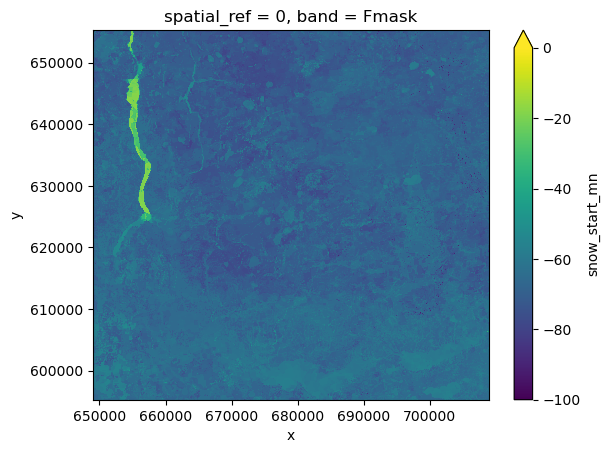

In [68]:
mean_weighted['snow_start_mn'].plot(cmap = 'viridis', vmin = -100, vmax = 0)

In [ ]:
mean_weighted['snow_start_mn'].plot.hist(xlim = (-100, 0))
print(round(float(mean_weighted['snow_start_mn'].mean()), 1))
print(round(float(mean_weighted['snow_start_mn'].std()), 1))

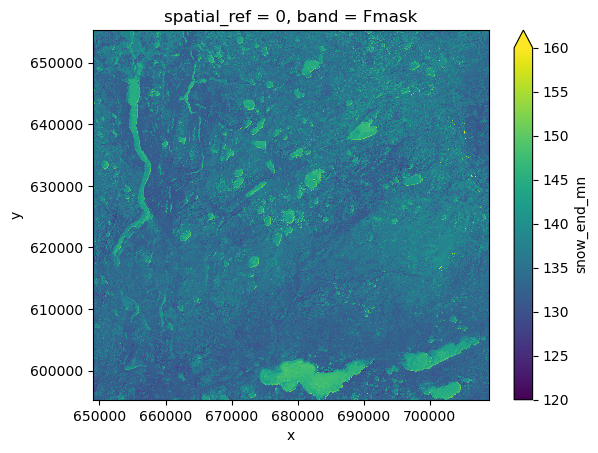

In [69]:
mean_weighted['snow_end_mn'].plot(cmap = 'viridis', vmin = 120, vmax = 160)

In [ ]:
mean_weighted['snow_end_mn'].plot.hist(xlim = (100, 190))
print(round(float(mean_weighted['snow_end_mn'].mean()), 1))
print(round(float(mean_weighted['snow_end_mn'].std()), 1))

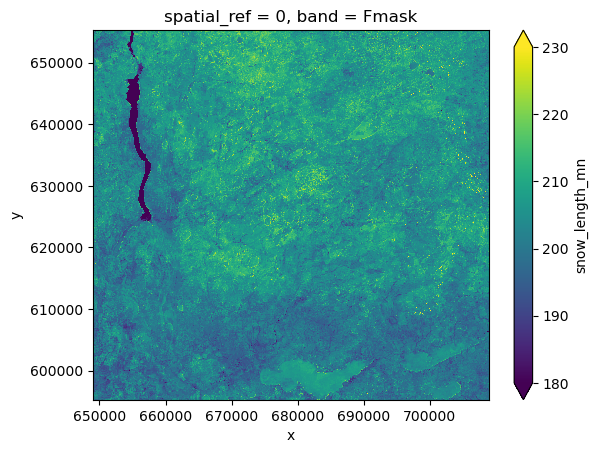

In [70]:
mean_weighted['snow_length_mn'].plot(cmap = 'viridis', vmin = 180, vmax = 230)

In [ ]:
mean_weighted['snow_length_mn'].plot.hist(xlim = (180, 230))
print(round(float(mean_weighted['snow_length_mn'].mean()), 1))
print(round(float(mean_weighted['snow_length_mn'].std()), 1))

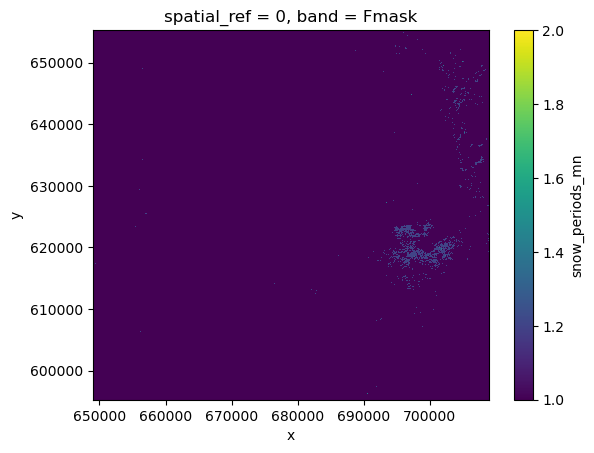

In [71]:
mean_weighted['snow_periods_mn'].plot(vmin = 1, vmax = 2)

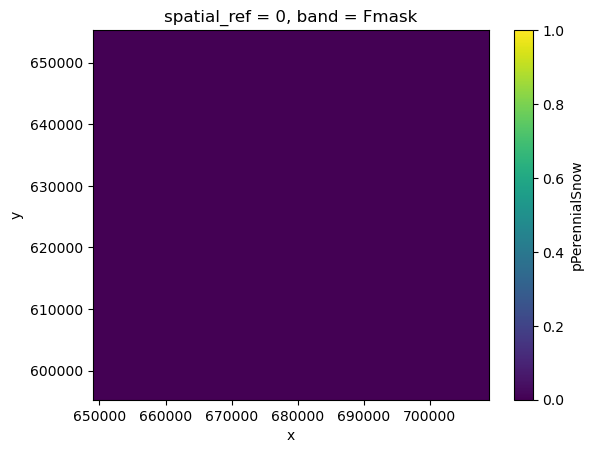

In [72]:
mean_weighted['pPerennialSnow'].plot(vmin = 0, vmax = 1)

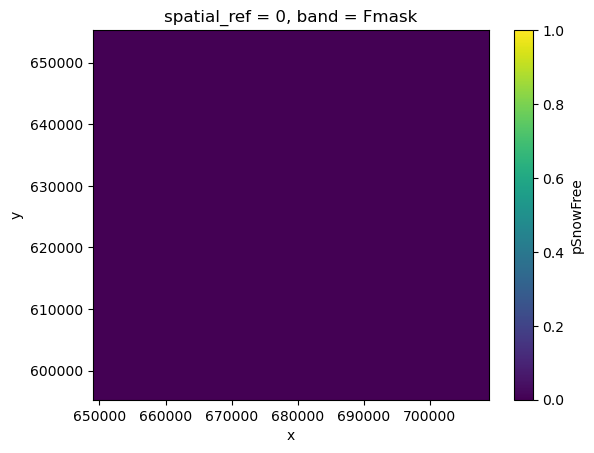

In [73]:
mean_weighted['pSnowFree'].plot(vmin = 0, vmax = 1)

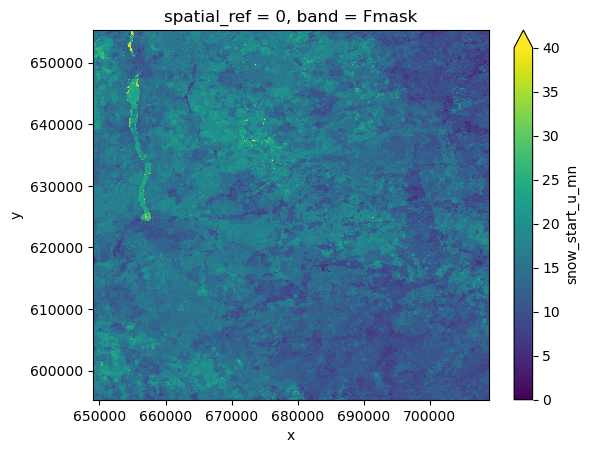

In [75]:
mean_weighted['snow_start_u_mn'].plot(cmap = 'viridis', vmin = 0, vmax = 40)

In [ ]:
mean_weighted['snow_start_u_mn'].plot.hist(xlim = (0, 40))
print(round(float(mean_weighted['snow_start_u_mn'].mean()), 1))
print(round(float(mean_weighted['snow_start_u_mn'].std()), 1))

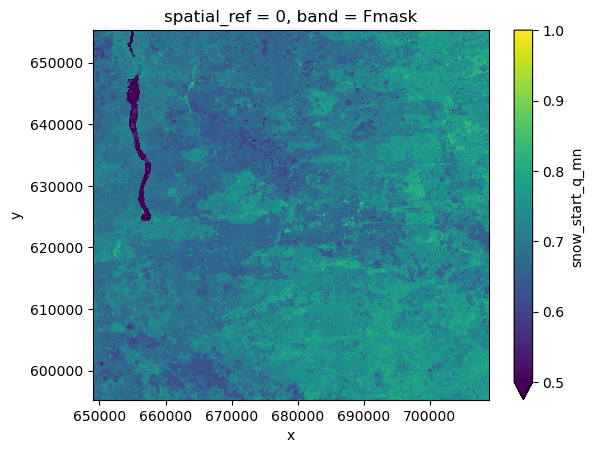

In [76]:
mean_weighted['snow_start_q_mn'].plot(cmap = 'viridis', vmin = 0.5, vmax = 1)

In [ ]:
mean_weighted['snow_start_q_mn'].plot.hist()
print(round(float(mean_weighted['snow_start_q_mn'].mean()), 2))
print(round(float(mean_weighted['snow_start_q_mn'].std()), 2))

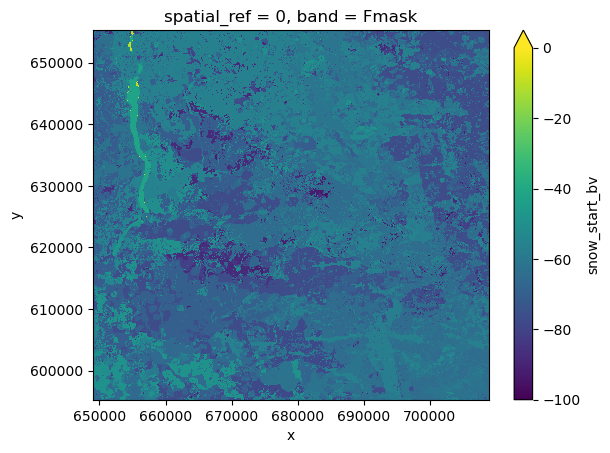

In [11]:
mean_weighted['snow_start_bv'].plot(cmap = 'viridis', vmin = -100, vmax = 0)

-65.1
9.0


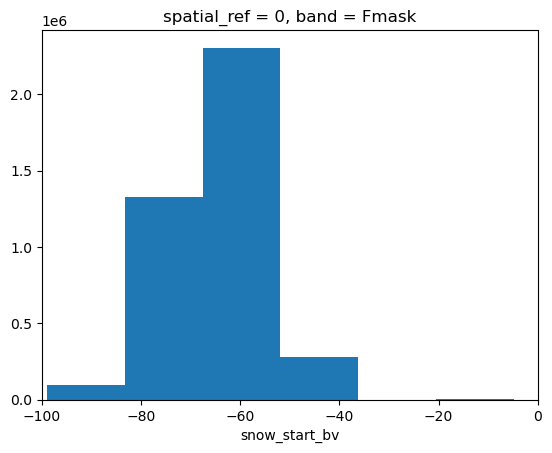

In [12]:
mean_weighted['snow_start_bv'].plot.hist(xlim = (-100, 0))
print(round(float(mean_weighted['snow_start_bv'].mean()), 1))
print(round(float(mean_weighted['snow_start_bv'].std()), 1))

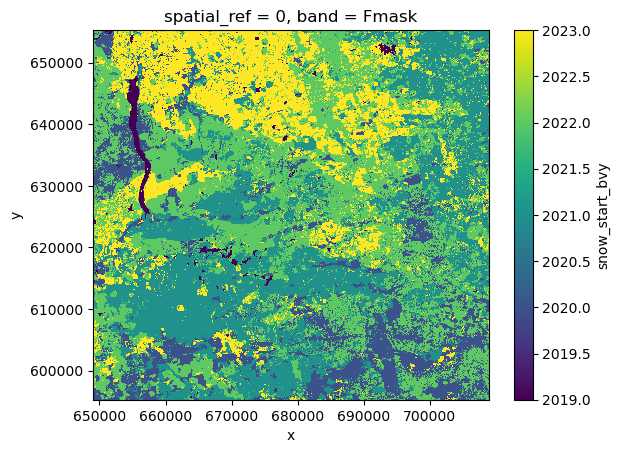

In [13]:
mean_weighted['snow_start_bvy'].plot(cmap = 'viridis', vmin = 2019, vmax = 2023)

2021.5
24.3


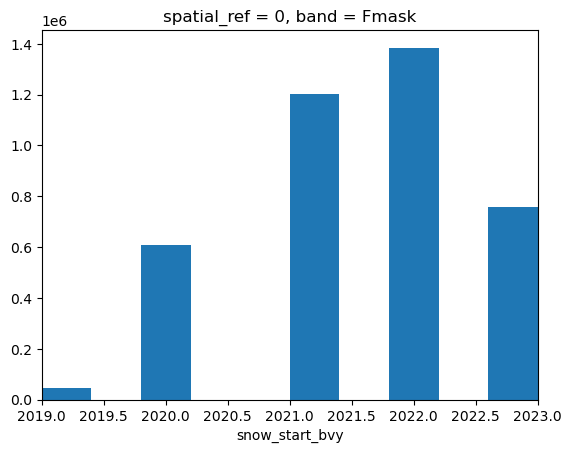

In [14]:
mean_weighted['snow_start_bvy'].plot.hist(xlim = (2019, 2023))
print(round(float(mean_weighted['snow_start_bvy'].mean()), 1))
print(round(float(mean_weighted['snow_start_bvy'].std()), 1))

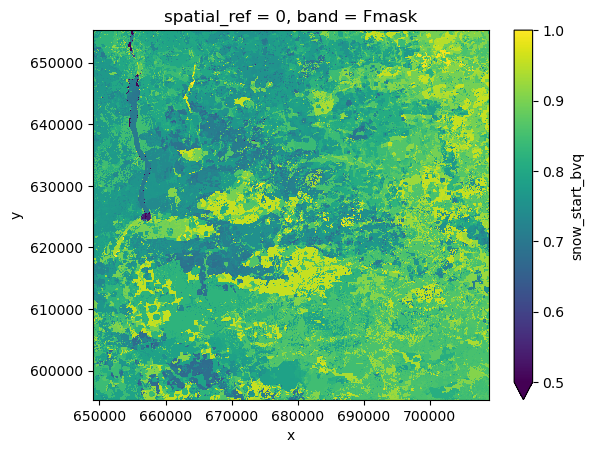

In [15]:
mean_weighted['snow_start_bvq'].plot(cmap = 'viridis', vmin = 0.5, vmax = 1)

0.82
0.07


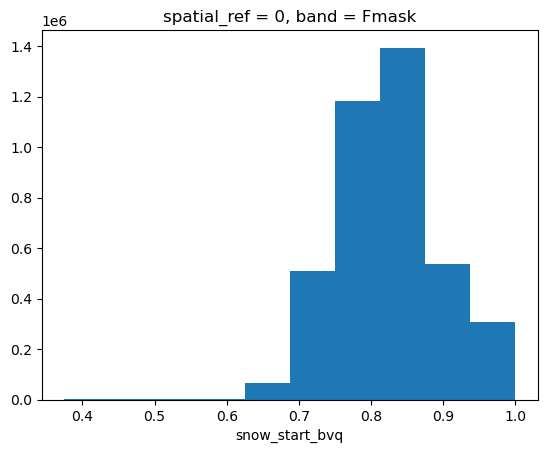

In [16]:
mean_weighted['snow_start_bvq'].plot.hist()
print(round(float(mean_weighted['snow_start_bvq'].mean()), 2))
print(round(float(mean_weighted['snow_start_bvq'].std()), 2))

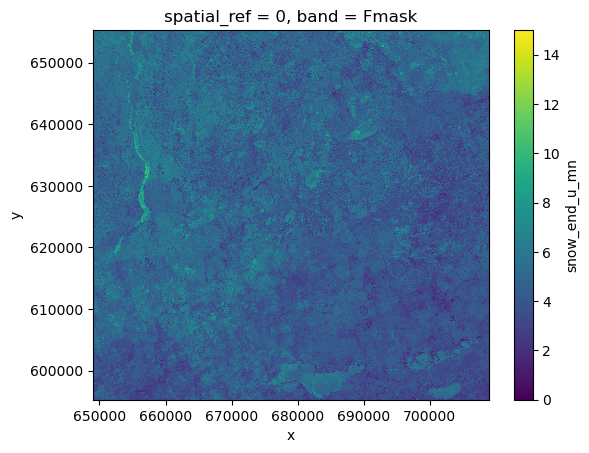

In [77]:
mean_weighted['snow_end_u_mn'].plot(cmap = 'viridis', vmin = 0, vmax = 15)

In [ ]:
mean_weighted['snow_end_u_mn'].plot.hist(xlim = (0, 15))
print(round(float(mean_weighted['snow_end_u_mn'].mean()), 1))
print(round(float(mean_weighted['snow_end_u_mn'].std()), 1))

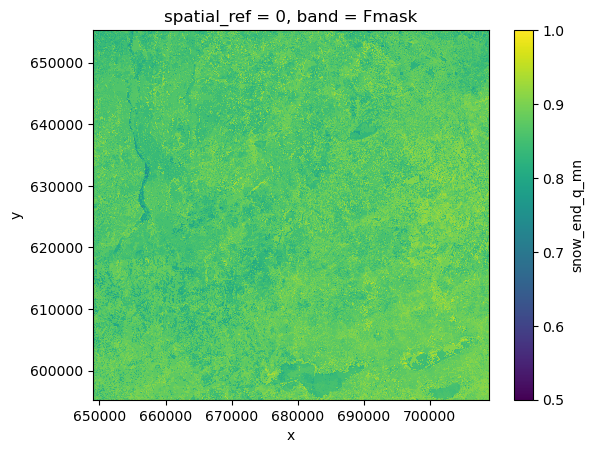

In [78]:
mean_weighted['snow_end_q_mn'].plot(cmap = 'viridis', vmin = 0.5, vmax = 1)

In [ ]:
mean_weighted['snow_end_q_mn'].plot.hist()
print(round(float(mean_weighted['snow_end_q_mn'].mean()), 2))
print(round(float(mean_weighted['snow_end_q_mn'].std()), 2))

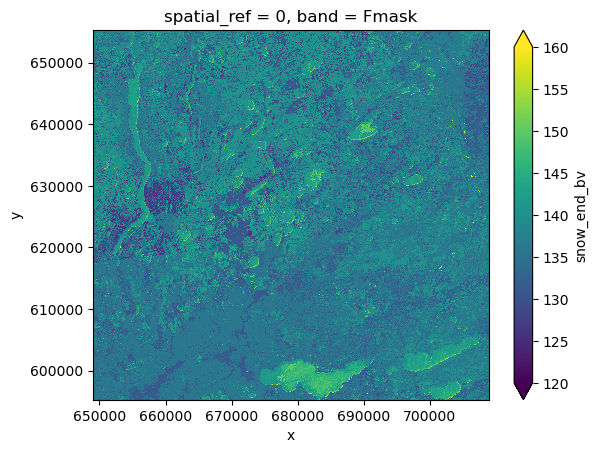

In [17]:
mean_weighted['snow_end_bv'].plot(cmap = 'viridis', vmin = 120, vmax = 160)

136.7
5.6


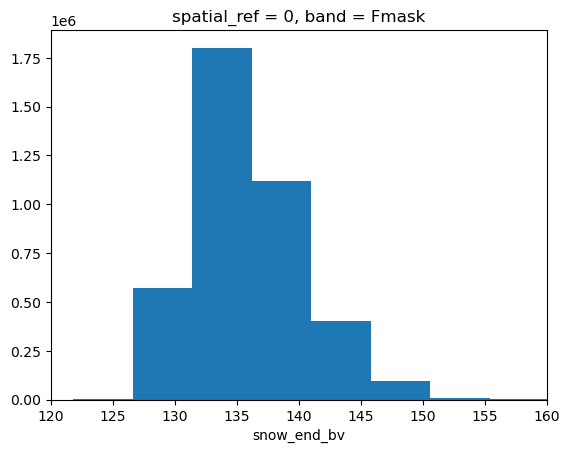

In [18]:
mean_weighted['snow_end_bv'].plot.hist(xlim = (120, 160))
print(round(float(mean_weighted['snow_end_bv'].mean()), 1))
print(round(float(mean_weighted['snow_end_bv'].std()), 1))

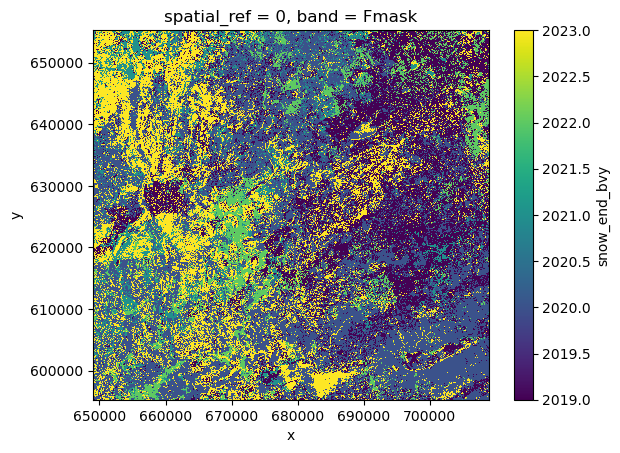

In [19]:
mean_weighted['snow_end_bvy'].plot(cmap = 'viridis', vmin = 2019, vmax = 2023)

2020.6
25.5


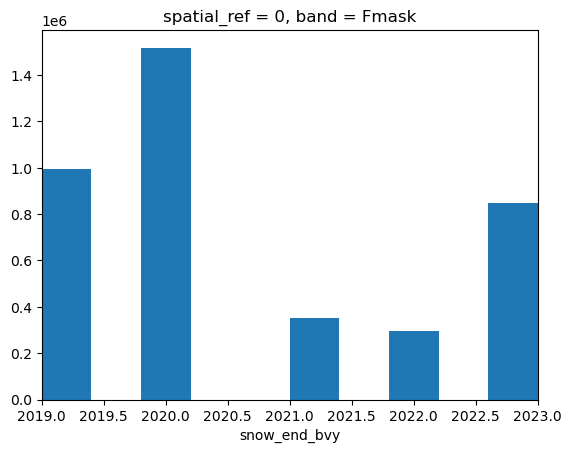

In [20]:
mean_weighted['snow_end_bvy'].plot.hist(xlim = (2019, 2023))
print(round(float(mean_weighted['snow_end_bvy'].mean()), 1))
print(round(float(mean_weighted['snow_end_bvy'].std()), 1))

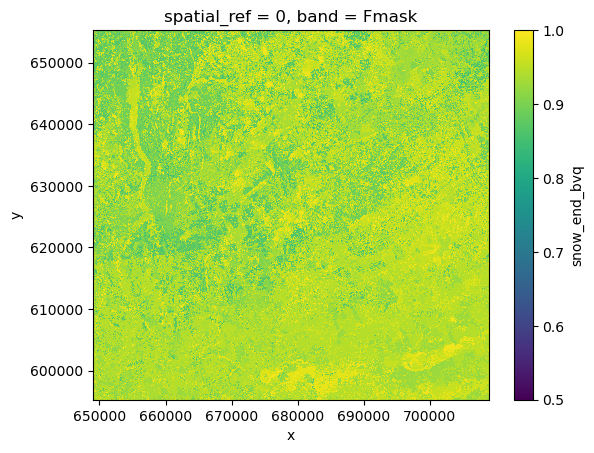

In [21]:
mean_weighted['snow_end_bvq'].plot(cmap = 'viridis', vmin = 0.5, vmax = 1)

0.93
0.04


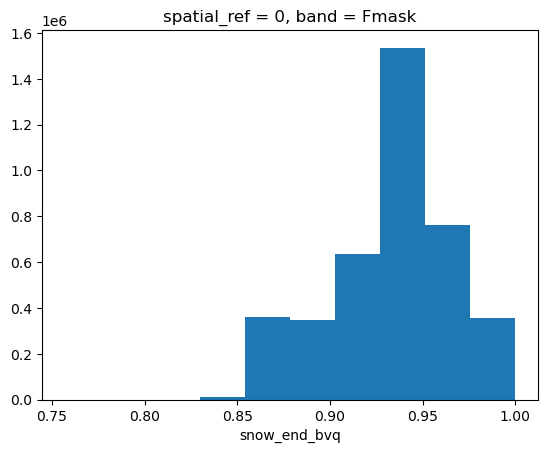

In [22]:
mean_weighted['snow_end_bvq'].plot.hist()
print(round(float(mean_weighted['snow_end_bvq'].mean()), 2))
print(round(float(mean_weighted['snow_end_bvq'].std()), 2))

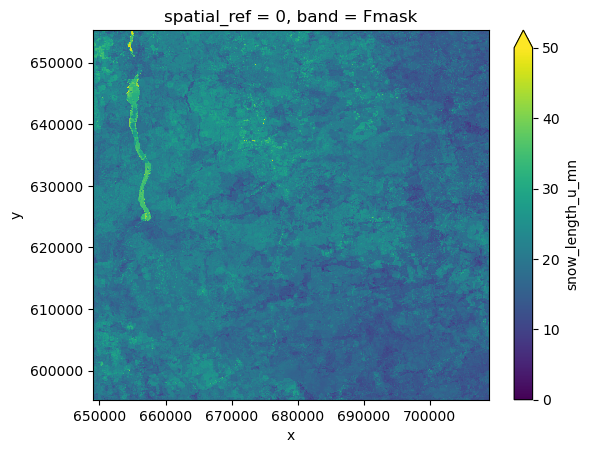

In [79]:
mean_weighted['snow_length_u_mn'].plot(cmap = 'viridis', vmin = 0, vmax = 50)

In [ ]:
mean_weighted['snow_length_u_mn'].plot.hist(xlim = (0, 50))
print(round(float(mean_weighted['snow_length_u_mn'].mean()), 1))
print(round(float(mean_weighted['snow_length_u_mn'].std()), 1))

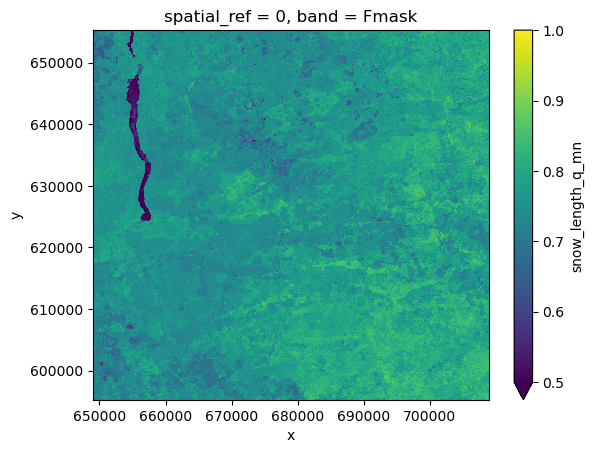

In [80]:
mean_weighted['snow_length_q_mn'].plot(cmap = 'viridis', vmin = 0.5, vmax = 1)

In [ ]:
mean_weighted['snow_length_q_mn'].plot.hist()
print(round(float(mean_weighted['snow_length_q_mn'].mean()), 2))
print(round(float(mean_weighted['snow_length_q_mn'].std()), 2))

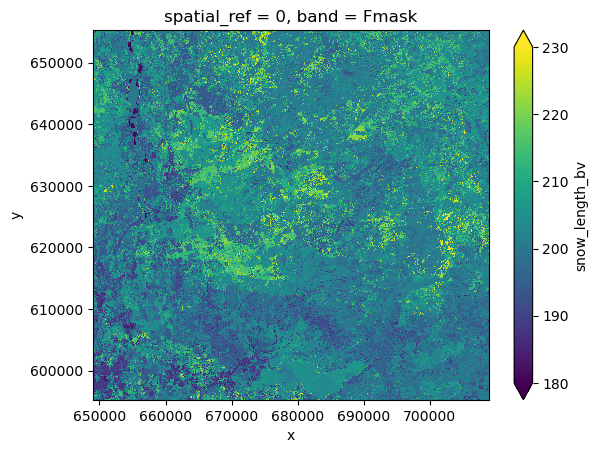

In [23]:
mean_weighted['snow_length_bv'].plot(cmap = 'viridis', vmin = 180, vmax = 230)

202.3
8.3


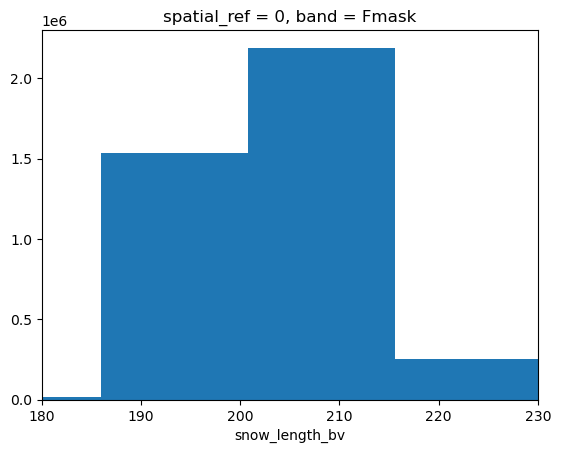

In [24]:
mean_weighted['snow_length_bv'].plot.hist(xlim = (180, 230))
print(round(float(mean_weighted['snow_length_bv'].mean()), 1))
print(round(float(mean_weighted['snow_length_bv'].std()), 1))

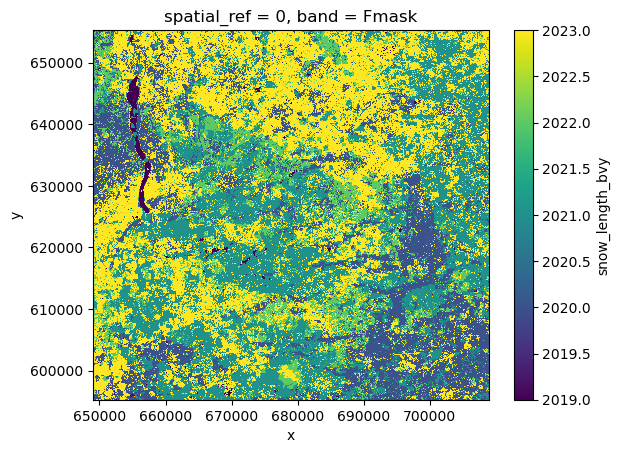

In [26]:
mean_weighted['snow_length_bvy'].plot(cmap = 'viridis', vmin = 2019, vmax = 2023)

2020.6
25.5


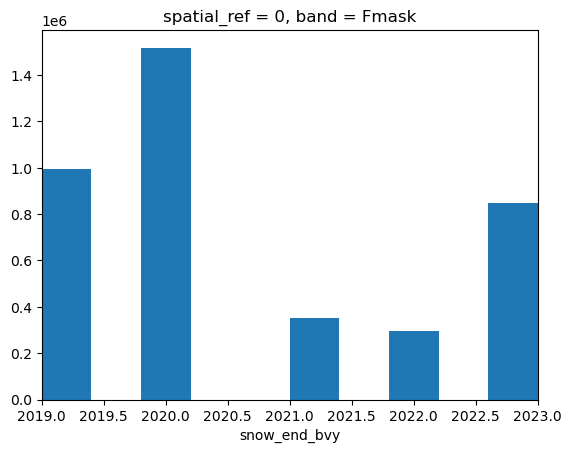

In [27]:
mean_weighted['snow_end_bvy'].plot.hist(xlim = (2019, 2023))
print(round(float(mean_weighted['snow_end_bvy'].mean()), 1))
print(round(float(mean_weighted['snow_end_bvy'].std()), 1))

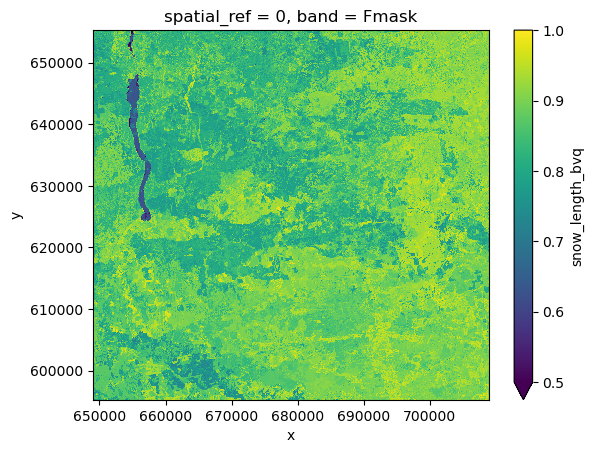

In [28]:
mean_weighted['snow_length_bvq'].plot(cmap = 'viridis', vmin = 0.5, vmax = 1)

0.87
0.05


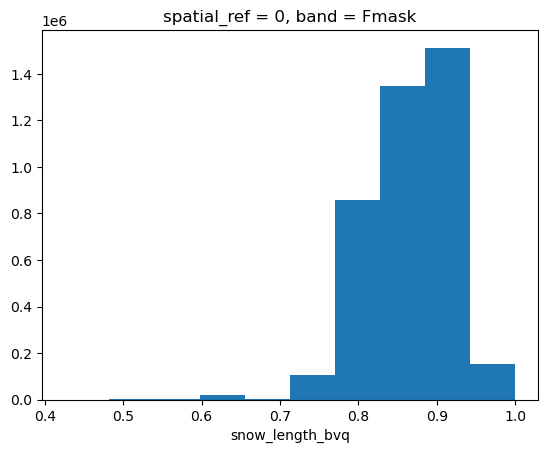

In [29]:
mean_weighted['snow_length_bvq'].plot.hist()
print(round(float(mean_weighted['snow_length_bvq'].mean()), 2))
print(round(float(mean_weighted['snow_length_bvq'].std()), 2))

# Save to NetCDF

In [ ]:
# %%time
# path = r'C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\HBL\TemporalSnow\Fmask_V1\Products\interannual_tile'
# pputil.downloadNC(mean_weighted, path, 'HLS_Fmask_snowDynamics1823_' + str(tile) + '.nc', type = '')

# Testing

In [ ]:
# test = pputil.uploadNC(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\HBL\TemporalSnow\Fmask_V1\SingleTileExample\Outputs\HLS_Fmask_snowDynamics_winterYear2223.nc",
#                        type = 'dataset')
# test = test.expand_dims(winterYear = xr.Variable('winterYear', ['2022-2023']))
# test

In [ ]:
# pputil.downloadNC(test, 
#                   r'C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\HBL\TemporalSnow\Fmask_V1\SingleTileExample\Outputs', 
#                   'HLS_Fmask_snowDynamics_winterYear' + '2223' + '1.nc', 
#                   type = '')

In [ ]:
# %%time 
# This is 20% slower than similar method with xr.where and mean()
# min_count = 3
# valid_count = snowDynamics['snow_start'].notnull().sum(dim = 'winterYear') # Number of valid values per pixel
# snow_start_mn = snowDynamics['snow_start'].sum(dim = 'winterYear', min_count = min_count) / valid_count
# snow_start_mn

In [ ]:
# %%time
# min_count = 3
# snowDynamics['snow_end'] = xr.where(snowDynamics['snow_end_u'] <= 15, snowDynamics['snow_end'], np.nan) 
# valid_count = snowDynamics['snow_end'].notnull().sum(dim = 'winterYear') # Number of valid values per pixel
# snowDynamics['snow_end'] = xr.where(valid_count >= min_count, snowDynamics['snow_end'], np.nan)
# snow_end_mn = snowDynamics['snow_end'].mean(dim = 'winterYear', skipna = True)
# snow_end_mn

In [ ]:
# min_count = 3
# snowDynamics['snow_end'] = xr.where(snowDynamics['snow_end_u'] <= 15, snowDynamics['snow_end'], np.nan) 
# snow_end_mn = snowDynamics['snow_end'].sum(dim = 'winterYear', min_count = min_count) / snowDynamics['snow_end'].notnull().sum(dim = 'winterYear') 
# #snowDynamics.sizes['winterYear']
# #snow_end_mn = snowDynamics['snow_end'].mean(dim = 'winterYear')
# snow_end_mn

In [ ]:
# tile = 904
# tile_stats.loc[tile]

In [ ]:
# if np.isnan(tile_stats.loc[tile, 'send_last']) == True:
#     implausible_snow = []
# else: # Week buffer from latest recorded end date and earliest recorded start date
#     implausible_snow = [int(tile_stats.loc[tile, 'send_last']) + 7, int(tile_stats.loc[tile, 'sstart_first']) - 7]

# implausible_snow

In [ ]:
# implausible_snow_prevYr = [implausible_snow[0] - 365, implausible_snow[1] - 365]
# implausible_snow_prevYr

In [ ]:
# implausible_snow[1] - 364

In [ ]:
# # For snow start, 
# snowDynamics['snow_start'].plot()

In [ ]:
#snowDynamics['snow_start'].min()

In [ ]:
# snowDynamics['snow_start'].max()

In [ ]:
# %%time

# # Get doys
# early_start = implausible_snow[1] - 365 # Day after early start day (-92)
# #early_start
# late_start = int(snowDynamics['snow_start'].quantile(0.95))  # Day before late end day (-50)
# #late_start

# # Get diffs
# early_diff = abs(snowDynamics['snow_start'] - early_start) # Negative (before abs) = early start day and before
# #early_diff
# late_diff = snowDynamics['snow_start'] - late_start # Positive = late end day and after
# #late_diff

# # Isolate outside
# #outside_diff = xr.where((snowDynamics['snow_start'] > early_start) & (snowDynamics['snow_start'] < late_start), 0, np.maximum(early_diff, late_diff))
# outside_diff = xr.where(snowDynamics['snow_start'] < early_start, early_diff, 0) # Add early_start days
# outside_diff = xr.where(snowDynamics['snow_start'] > late_start, late_diff, outside_diff) # Add late_start days
# #outside_diff

# weights_outside = 2.718 ** (-0.046 * outside_diff) # -0.046 means 50% weight on 15, exponential
# weights_outside

In [ ]:
# %%time 
# # This takes about a second to run

# # For early starts (during implausibile period)...
# early_start = implausible_snow[1] - 364 # Day after early start day (-92)
# #early_start
# early_diff = snowDynamics['snow_start'] - early_start # Negative = early start day and before
# early_diff = xr.where(early_diff < 0, abs(early_diff), 0) # Only care about early
# #early_diff
# weights_early = 2.718 ** (-0.046 * early_diff) # Harsher exponential for early (50% at 15)
# #weights_early

# # For late starts (90+ percentile)...
# late_start = int(snowDynamics['snow_start'].quantile(0.90)) -1  # Day before late end day (-52)
# #late_start
# late_diff = snowDynamics['snow_start'] - late_start # Positive = late end day and after
# late_diff = xr.where(late_diff > 0, late_diff, 0) # Only care about late
# #late_diff
# weights_late = 2.718 ** (-0.023 * late_diff) # Softer exponential for early (50% at 30)
# weights_late

# # test = xr.where((snowDynamics['snow_start'] > early_start) & (snowDynamics['snow_start'] < late_start), 1, snowDynamics['snow_start'])
# # test

In [ ]:
#np.unique(weights_late, return_counts = True)

In [ ]:
#np.unique(weights_early, return_counts = True)

In [ ]:
#np.unique(outside_diff, return_counts = True)

In [ ]:
# np.unique(weights_outside, return_counts = True)

In [ ]:
# %%time
# #(snowDynamics['snow_start'] > -25).sum()
# #snowDynamics['snow_start'].quantile(0.05) # Best to do quantile across all years and pixels? (no winterYear dim)

In [ ]:
# int(snowDynamics['snow_start'].quantile(0.90))# + 100

In [ ]:
# np.unique(snowDynamics['snow_start'], return_counts = True)

In [ ]:
# %%time
# test = snowDynamics['snow_end']

# # Uncertainty weights (50%)
# weights_u = 2.718 ** (-0.046 * snowDynamics['snow_end_u']) # -0.046 means 50% weight on 15, # -0.023 mean 50% weight on 30
# #weights_u

# # Implausibility 1 weights: Dates vs IMS implausible snow (25%)

# # Implausibility 2 weights: Difference from pixel median (25%)
# med_diff = abs(test - test.median(dim = 'winterYear', skipna = True))
# weights_i2 = 2.718 ** (-0.023 * med_diff) # -0.023 mean 50% weight on 30
# #weights_i2

# # Combined weights (weighted sum)
# weights_c = (weights_u * 0.5) + (weights_i2 * 0.5)
# #weights_c

# # # Weighted mean
# # test = test.weighted(weights_u).mean(dim = 'winterYear', skipna = True)
# # test

In [ ]:
#np.unique(abs(test - test.median(dim = 'winterYear', skipna = True)), return_counts = True)

In [ ]:
#abs(test - test.median(dim = 'winterYear', skipna = True)).mean()

In [ ]:
# weights_u.weighted(weights_u).mean(dim = 'winterYear', skipna = True).plot()

In [ ]:
#test.rio.to_raster('snowEnd_1823_mean_weighted_onlyunc.tif')

In [ ]:
#(snow_start_mn - mean_weighted['snow_start_mn']).plot()

In [ ]:
# %%time
# weights_u = 2.718 ** (-0.046 * snowDynamics['snow_start_u']) # -0.046 means 50% weight on 15, exponential

# early_start = implausible_snow[1] - 365
# late_start = int(snowDynamics['snow_start'].quantile(0.95))  # After this day = late end 
# early_diff = abs(snowDynamics['snow_start'] - early_start) # Negative (before abs) = Before early start
# late_diff = snowDynamics['snow_start'] - late_start # Positive = After late end
# outside_diff = xr.where(snowDynamics['snow_start'] < early_start, early_diff, 0) # Add early_start days
# outside_diff = xr.where(snowDynamics['snow_start'] > late_start, late_diff, outside_diff) # Add late_start days
# weights_i1 = 2.718 ** (-0.046 * outside_diff) # -0.046 means 50% weight on 15, exponential

# med_diff = abs(snowDynamics['snow_start'] - snowDynamics['snow_start'].median(dim = 'winterYear', skipna = True))
# weights_i2 = 2.718 ** (-0.023 * med_diff) # -0.023 mean 50% weight on 30

# weights_start_c = (weights_u * 0.5) + (weights_i1 * 0.25) + (weights_i2 * 0.25) # 50% weight for uncertainty, 50% for implausibility
# snow_start_mn = snowDynamics['snow_start'].weighted(weights_start_c).mean(dim = 'winterYear', skipna = True)
# snow_start_mn

In [ ]:
#%%time
# weights_u = 2.718 ** (-0.046 * snowDynamics['snow_end_u']) # -0.046 means 50% weight on 15, exponential

# late_end = implausible_snow[0] # After this date = late end (163)
# early_end = int(snowDynamics['snow_end'].quantile(0.05)) # Before this day = early end (124) 
# late_diff = snowDynamics['snow_end'] - late_end # Positive = After late end
# early_diff = abs(snowDynamics['snow_end'] - early_end) # Negative (before abs) = Before early end 
# outside_diff = xr.where(snowDynamics['snow_end'] < early_end, early_diff, 0) # Add early end days
# outside_diff = xr.where(snowDynamics['snow_end'] > late_end, late_diff, outside_diff) # Add late end days
# weights_i1 = 2.718 ** (-0.046 * outside_diff) # -0.046 means 50% weight on 15, exponential

# med_diff = abs(snowDynamics['snow_end'] - snowDynamics['snow_end'].median(dim = 'winterYear', skipna = True))  
# weights_i2 = 2.718 ** (-0.023 * med_diff) # -0.023 mean 50% weight on 30       

# weights_end_c = (weights_u * 0.5) + (weights_i1 * 0.25) + (weights_i2 * 0.25) # 50% weight for uncertainty, 50% for implausibility
# snow_end_mn = snowDynamics['snow_end'].weighted(weights_end_c).mean(dim = 'winterYear', skipna = True)
# snow_end_mn

In [ ]:
# snowDynamics['snow_length'] = snowDynamics['snow_length'].astype('float32') # Helps with math, may have NAs
# snowDynamics['snow_length']

In [ ]:
# %%time
# weights_u = 2.718 ** (-0.023 * snowDynamics['snow_length_u']) # -0.023 means 50% weight on 30, exponential

# too_long = 365 - (implausible_snow[1] - implausible_snow[0]) # More than this many days = too much snow cover (256)
# too_short = int(snowDynamics['snow_length'].quantile(0.05)) # Less than this many days = too little snow cover (185)
# long_diff = snowDynamics['snow_length'] - too_long # Positive = Too long
# short_diff = abs(snowDynamics['snow_length'] - too_short) # Negative (before abs) = Too short
# outside_diff = xr.where(snowDynamics['snow_length'] > too_long, long_diff, 0) # Add too long snow cover
# outside_diff = xr.where(snowDynamics['snow_length'] < too_short, short_diff, outside_diff) # Add too short snow cover
# weights_i1 = 2.718 ** (-0.046 * outside_diff) # -0.046 means 50% weight on 15, exponential

# med_diff = abs(snowDynamics['snow_length'] - snowDynamics['snow_length'].median(dim = 'winterYear', skipna = True))  
# weights_i2 = 2.718 ** (-0.023 * med_diff) # -0.023 mean 50% weight on 30     

# weights_length_c = (weights_u * 0.5) + (weights_i1 * 0.25) + (weights_i2 * 0.25) # 50% weight for uncertainty, 50% for implausibility
# snow_length_mn = snowDynamics['snow_length'].weighted(weights_length_c).mean(dim = 'winterYear', skipna = True)
# snow_length_mn

In [ ]:
# import math
# min_count = math.ceil(snowDynamics.sizes['winterYear'] / 2)
# min_count

In [ ]:
# valid_count = snowDynamics['snow_start'].notnull().sum(dim = 'winterYear') # Number of valid values per pixel
# snowDynamics['snow_start'] = xr.where(valid_count >= min_count, snowDynamics['snow_start'], np.nan) # Filter by valid_count

In [ ]:
# weights_u = 2.718 ** (-0.046 * snowDynamics['snow_start_u'])

In [ ]:
# early_start = implausible_snow[1] - 365 # Before this date = early start
# late_start = int(snowDynamics['snow_start'].quantile(0.95))  # After this day = late start

In [ ]:
# early_diff = abs(snowDynamics['snow_start'] - early_start) # Negative (before abs) = Before early start
# late_diff = snowDynamics['snow_start'] - late_start # Positive = After late start

In [ ]:
# outside_diff = xr.where(snowDynamics['snow_start'] >= early_start, 0, early_diff) # Add early end days
# outside_diff = xr.where(snowDynamics['snow_start'] <= late_start, outside_diff, late_diff) # Add late end days

In [ ]:
# weights_i1 = 2.718 ** (-0.046 * outside_diff) # -0.046 means 50% weight on 15, exponential

In [ ]:
# med_diff = abs(snowDynamics['snow_start'] - snowDynamics['snow_start'].median(dim = 'winterYear', skipna = True))
# weights_i2 = 2.718 ** (-0.046 * med_diff) # -0.046 mean 50% weight on 15, exponential    

In [ ]:
# weights_start_c = (weights_u * 0.5) + (weights_i1 * 0.25) + (weights_i2 * 0.25)

In [ ]:
# weights_start_c#.plot.hist()

In [ ]:
# snow_start_mn = snowDynamics['snow_start'].weighted(weights_start_c.fillna(0)).mean(dim = 'winterYear', skipna = True) #  Don't need for best value

In [ ]:
# %%time
# snow_start_bvi = weights_start_c.fillna(0).argmax(dim = 'winterYear', skipna = True) # Fill na or get error
# # + 2019 # Add 2019 to get second year of winter year (later for when outputting product)
# snow_start_bvi

In [ ]:
#np.unique(snow_start_bvy, return_counts = True)

In [ ]:
# %%time
# snow_start_bv = snowDynamics['snow_start'].isel(winterYear = snow_start_bvi)
# snow_start_bv

In [ ]:
# snow_start_bv.plot()

In [ ]:
# %%time
# snow_start_bvy = xr.where(snow_start_bv.notnull(), snow_start_bvi + 2019, np.nan).astype('float32')                                                                
# # Add 2019 to get second year of winter year (later for when outputting product)
# snow_start_bvy

In [ ]:
# snow_start_bvy.plot()

In [ ]:
#weights_start_c.isnull().sum()

In [ ]:
#snow_start_bv.isnull().sum()

In [ ]:
#mean_weighted['snow_start_mn'].plot()

In [ ]:
#mean_weighted['snow_start_mn'].isnull().sum()

In [ ]:
#https://stackoverflow.com/questions/66441227/use-the-argmax-of-one-data-group-to-get-the-corresponding-data-of-another-group

In [ ]:
# %%time
# snow_start_bvq = weights_start_c.isel(winterYear = snow_start_bvi)
# snow_start_bvq

In [ ]:
#snow_start_bvq.plot()

In [ ]:
#snow_start_bvq.dtype

In [1]:
# mean_weighted['snow_periods_mn'].plot()

In [63]:
# np.unique(mean_weighted['snow_periods_mn'], return_counts = True)

In [62]:
# import scipy

# def _mode(*args, **kwargs):
#     vals = scipy.stats.mode(*args, **kwargs)
#     # only return the mode (discard the count)
#     return vals[0].squeeze()

In [61]:
# def mode(obj, dim):
#     # note: apply always moves core dimensions to the end
#     # usually axis is simply -1 but scipy's mode function doesn't seem to like that
#     # this means that this version will only work for DataArray's (not Datasets)
#     assert isinstance(obj, xr.DataArray)
#     axis = obj.ndim - 1
#     return xr.apply_ufunc(_mode, obj,
#                           input_core_dims=[[dim]],
#                           kwargs={'axis': axis})

In [2]:
# %%time
# #snowDynamics['snow_periods'].mode(dim = 'winterYear')
# #test = mode(snowDynamics['snow_periods'], dim = 'winterYear') # Takes 6 minutes!! 
# test = snowDynamics['snow_periods'].median(dim = 'winterYear') # Less than 1 second
# test 

In [3]:
# test.plot()

In [4]:
# np.unique(test, return_counts = True)